Pierre-Henri Engelhard, Aurane Schaff, Guillaume Sylvestre

In [47]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Functions

In [35]:
# define the function
def f(x):
    return 1/(1+x**2)

def f1(x):
    return m.exp(-x)/x**2

def f2(x):
    return m.sin(x**3)

def f3(x):
    return x/m.log(x)

def f4(x):
    return m.sin(x)/(1+x**6)

def f5(x):
    return m.cos(m.sin(x))

def f6(x):
    return 1/m.log(4+x)

# Question 1

## Left rectangle

In [49]:
def MGauche(f,a,b,N):
    h = (b-a)/N
    s = 0
    for i in range(N):
        s += f(a+i*h)
    return h*s  

## Right rectangle

In [50]:
def MDroite(f,a,b,N):
    h = (b-a)/N
    s = 0
    for i in range(1,N+1):
        s += f(a+i*h)
    return h*s

## Trapezoidal method

In [51]:
def MTrapezes(f,a,b,N):
    """Calculates the integral of a function using the trapezoidal rule"""
    #Step size
    h = (b-a)/N
    #Array of x values
    x = np.linspace(a,b,N+1)
    #Trapezoidal rule
    I = 0
    for i in range (N):
        I += (h/2)*(f(x[i]) + f(x[i+1]))
    return I

## Midpoint method

In [52]:
def MPointMilieu(f, a, b, N):
    result = 0
    h = (a+b) / N  # number of intervals
    x = np.linspace(a, b, N+1)  # N+1 points make N intervals
    for i in range (1, N+1):
        center_point = (x[i]+ x[i-1]) / 2  # calculate the center point of each interval
        result = result + (h * f(center_point))  # add the area of each rectangle to the result
    
    return result

## Simpson

In [53]:
def MSimpson(f,a,b,N):
    """Calculates the integral of a function using Simpson's rule"""
    #Step size
    h = (b-a)/N
    #Array of x values
    x = np.linspace(a,b,N+1)
    #Simpson's rule
    I = 0
    for i in range (N):
        #c coefficient
        ci = 0.5*(x[i] + x[i+1])
        I += (h/6)*(f(x[i]) + 4*f(ci) + f(x[i+1]))
    return I

## Gauss-Legendre

In [54]:
def MformuleGL2(f, a, b, N):
    h = (a+b) / N  # number of intervals
    approximation = 0  # initialize the result
    for i in range (0, N):
        approximation += f(-(h/(2*np.sqrt(3)))*a + i*h) + f((h/(2*np.sqrt(3)))*a + i*h)  # summation of all the intervals using the Gauss-Legendre method
    approximation *= (h/2)  # multiply the result by h/2 to obtain the result of the integral
    
    return approximation

## Boole-Villarceau

In [55]:
def MBooleV(f,a,b,N):
    h = (b-a)/N  # number of intervals
    s = 0  # initialize the result
    for i in range(0,N,4):
        s += 7*f(a+i*h) + 32*f(a+(i+1)*h) + 12*f(a+(i+2)*h) + 32*f(a+(i+3)*h) + 7*f(a+(i+4)*h)  # summation of all the intervals using the Boole-Villarceau method
    return 2*h*s/45

# Question 2

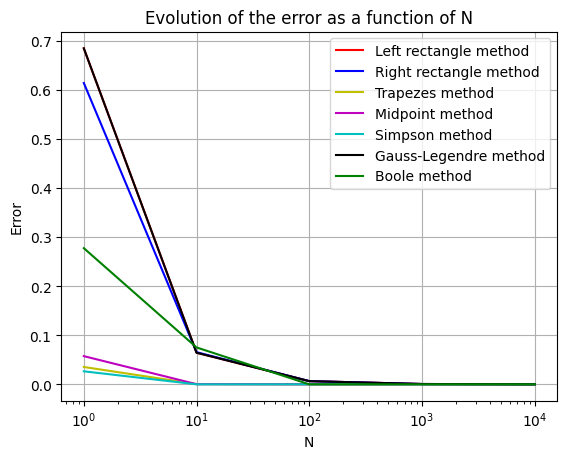

In [56]:
x=[1,10,100,1000,10000]
y_LRM=[]
y_RRM=[]
y_Trapezes=[]
y_ptMilieu=[]
y_Simpson=[]
y_GL2=[]
y_Boole=[]

# error estimation for the left rectangle method
for N in x:
    I_MGauche=MGauche(f,0,m.sqrt(3),N)
    error_MGauche = abs(I_MGauche - m.pi/3)
    y_LRM.append(error_MGauche)

# error estimation for the right rectangle method
for N in x:
    I_MDroite=MDroite(f,0,m.sqrt(3),N)
    error_MDroite = abs(I_MDroite - m.pi/3)
    y_RRM.append(error_MDroite)

# error estimation for the Boole method
for N in x:
    I_MBooleV=MBooleV(f,0,m.sqrt(3),N)
    error_MBooleV = abs(I_MBooleV - m.pi/3)
    y_Boole.append(error_MBooleV)

# error estimation for the trapezes method
for N in x:
    I_MTrap=MTrapezes(f,0,m.sqrt(3),N)
    error_MTrap = abs(I_MTrap - m.pi/3)
    y_Trapezes.append(error_MTrap)    
    
# error estimation for the midpoint method
for N in x:
    I_MMidPoint=MPointMilieu(f,0,m.sqrt(3),N)
    error_MMidPoint = abs(I_MMidPoint - m.pi/3)
    y_ptMilieu.append(error_MMidPoint)
    
# error estimation for the Simpson method
for N in x:
    I_MSimpson= MSimpson(f,0,m.sqrt(3),N)
    error_MSimpson = abs(I_MSimpson - m.pi/3)
    y_Simpson.append(error_MSimpson)
    
# error estimation for the Gauss-Legendre method
for N in x:
    I_MGaussLegendre= MformuleGL2(f,0,m.sqrt(3),N)
    error_MformuleGL2 = abs(I_MGaussLegendre - m.pi/3)
    y_GL2.append(error_MformuleGL2)
    
# plot the error as a function of N
plt.figure()
plt.plot(x,y_LRM,'r', label='Left rectangle method') # left rectangle method
plt.plot(x,y_RRM,'b', label='Right rectangle method') # right rectangle method
plt.plot(x,y_Trapezes,'y', label='Trapezes method') # Trapezes method
plt.plot(x,y_ptMilieu,'m', label='Midpoint method') # Midpoint method
plt.plot(x,y_Simpson,'c', label='Simpson method') # Simpson method
plt.plot(x,y_GL2,'k', label='Gauss-Legendre method') # Gauss-Legendre method
plt.plot(x,y_Boole,'g', label='Boole method') # Boole method
plt.legend()
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Evolution of the error as a function of N')
plt.grid()
plt.show()

As we can see from the plot the error decreases for all the function as the number of subdivisions increases. This can be explained by the fact that the parameter h use in the calculation of the error decreases as the number of subdivisions increases which is in correlation with our results.

# Question 3

In [64]:
def error(function ,a,b, N):
    """Calculates the error of the Simpson's method"""
    #Exact value
    temp = quad(f,a,b)
    Iexact = temp[0]
    #Method value
    I = MSimpson(f,a,b,N)
    #Error
    E = abs(Iexact - I)
    
    print("The value of the integral using Simpson method is ", Iexact)
    
    return E

For the end of the question we will use the same subdivision for all the functions with N = 100

In [65]:
list_f = [f1,f2,f3,f4,f5,f6]
bound_integration = [(1,2), (0,2), (2,10), (0,1), (0, np.pi), (0,3)]
subdivision = 100

for i in range (len(list_f)):
    print(f"The error for the function f{i+1} is {error(list_f[i], bound_integration[i][0], bound_integration[i][1], subdivision)} \n")

The value of the integral using Simpson method is  0.3217505543966422
The error for the function f1 is 7.998046669399628e-13 

The value of the integral using Simpson method is  1.1071487177940904
The error for the function f2 is 1.2799539206298505e-11 

The value of the integral using Simpson method is  0.3639789565096444
The error for the function f3 is 3.272635384909961e-09 

The value of the integral using Simpson method is  0.7853981633974484
The error for the function f4 is 3.3306690738754696e-16 

The value of the integral using Simpson method is  1.2626272556789226
The error for the function f5 is 1.621480727465041e-11 

The value of the integral using Simpson method is  1.2490457723982544
The error for the function f6 is 1.619970824151551e-11 


As we can see all the error in the integration are smaller than 1e-09 using 100 as the number of subdivision of the given interval. The accuracy can be improved by increasing the number of subdivision.